<a href="https://colab.research.google.com/github/issatyajit/Heart-Disease-Prediction-Classification-/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.metrics import make_scorer, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from imblearn.combine import SMOTETomek
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.svm import SVC
!pip install shap
import shap
shap.initjs()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.3 MB/s 


In [ ]:
df = pd.read_csv('/content/data_cardiovascular_risk.csv').drop(columns=['id'])

#**EDA**

In [ ]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


In [ ]:
df.describe(include='all')

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


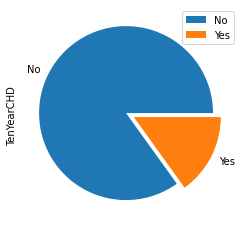

In [ ]:
#Checking imbalance in target variable
pd.DataFrame(df['TenYearCHD'].replace({0:'No',1:'Yes'}).value_counts()).plot(kind='pie',y='TenYearCHD',explode = (0.05, 0.05))

#**Null value treatment**

In [ ]:
#getting number of null values
value_nulldf = pd.DataFrame(df.isnull().sum(),columns=['value_counts'])
percent_null_df = pd.DataFrame(round(df.isnull().sum() * 100 / df.shape[0],2),columns=['percentage'])
fdf=pd.concat([value_nulldf, percent_null_df],axis=1)
fdf[fdf['value_counts']!=0]

,value_counts,percentage
education,87,2.57
cigsPerDay,22,0.65
BPMeds,44,1.30
totChol,38,1.12
BMI,14,0.41
heartRate,1,0.03
glucose,304,8.97


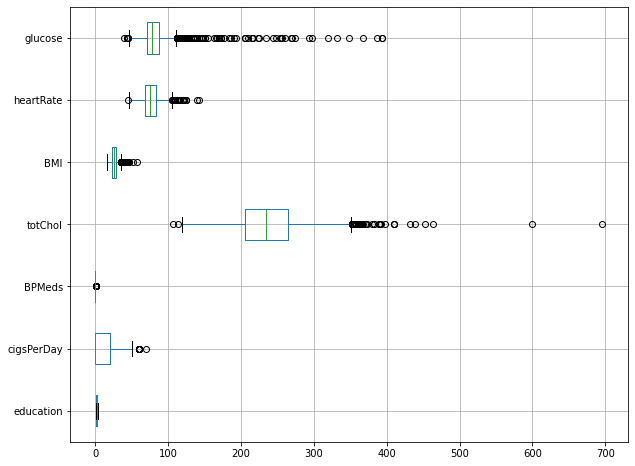

In [ ]:
plt.figure(figsize=(10,8))
df[df.columns[df.isnull().any()].tolist()].boxplot(vert=False,figsize=(10,6)) #evaluating values to impute in null values
#Since almost all the datas are right skewed, we impute median value

In [ ]:
df1 = df.copy() #creating a copy of original untethered dataset

In [ ]:
#imputing null values with median
na_columns = df1.columns[df1.isnull().any()].tolist()
for col in na_columns:
  df1[col].fillna(df1[col].median(),inplace = True)

#**Outlier treatment**

In [ ]:
#Now we divide the columns into numerical and categorical
categorical_columns = [col for col in df1.columns if len(df[col].unique())<=4]
numerical_columns = list(set(df1.columns) - set(categorical_columns))

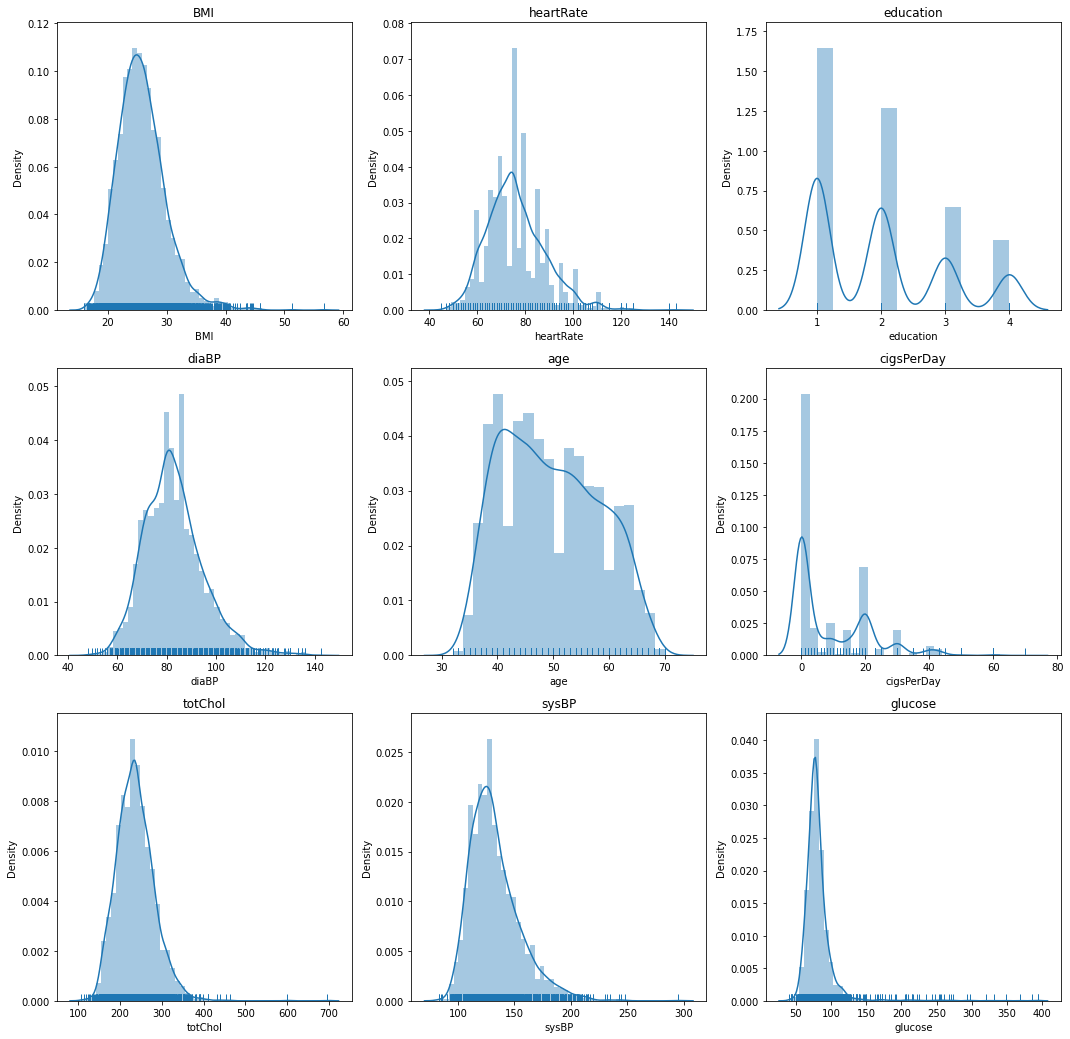

In [ ]:
#getting distplot of numeric features
for i,col in enumerate(numerical_columns):
  plt.subplot(3,3,i+1)
  g=sns.distplot(df1[col], rug=True)
  g.figure.set_size_inches(18,18)
  plt.title(col)

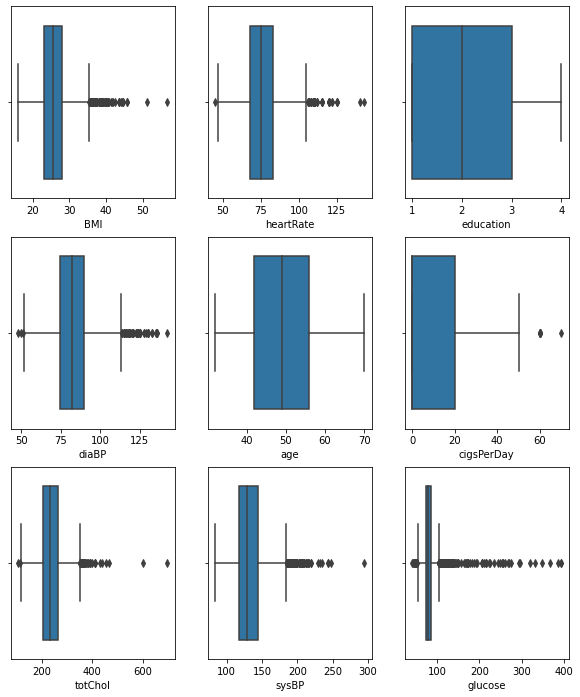

In [ ]:
for i,col in enumerate(numerical_columns):
  plt.subplot(3,3,i+1)
  g=sns.boxplot(df1[col])
  g.figure.set_size_inches(10,12)

In [ ]:
before_otlier_treatment_df = df1.copy()

In [ ]:
#a function to replace outliers with a value
def replace_outliers(dataframe, columns):
  '''Takes dataframe and columns as a list then replaces them with value. value is median'''
  for col in columns:
    q1, q3 = dataframe[col].quantile([0.25,0.75])
    lower_limit = q1 - 1.5 * (q3 - q1)
    upper_limit = q3 + 1.5 * (q3 - q1)
    dataframe[col] = np.where(dataframe[col]<lower_limit,df1[col].median(),dataframe[col])
    dataframe[col] = np.where(dataframe[col]>upper_limit,df1[col].median(),dataframe[col])
  return dataframe.head()

In [ ]:
replace_outliers(df1,numerical_columns) #removing outliers

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64.0,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36.0,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46.0,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50.0,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64.0,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


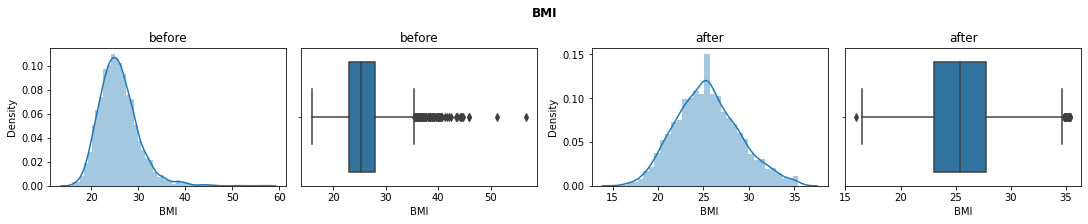

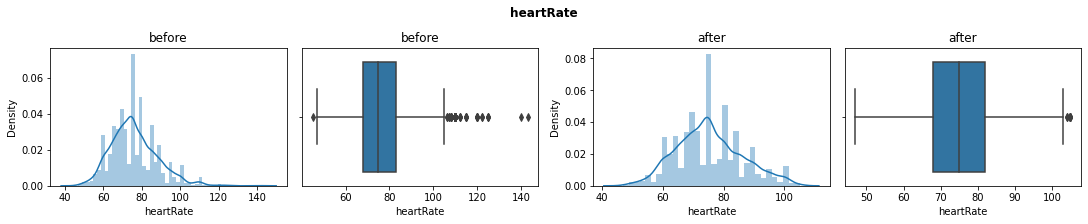

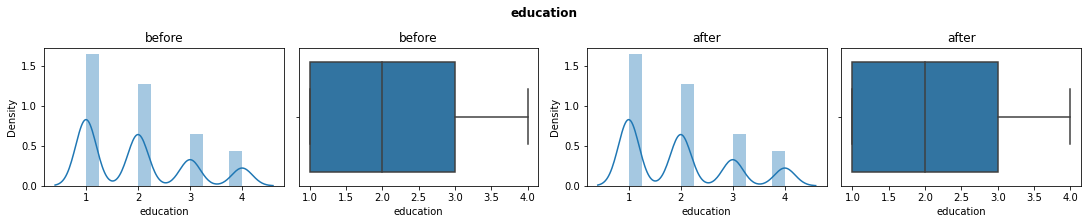

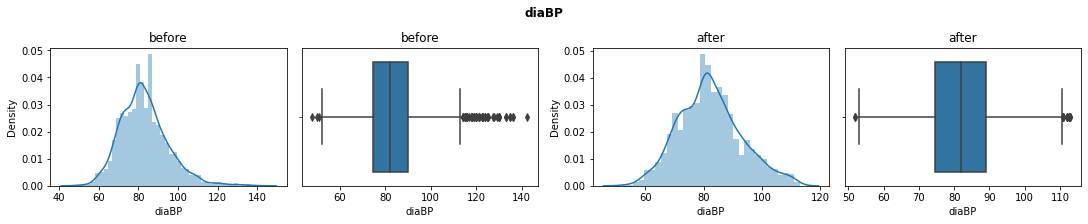

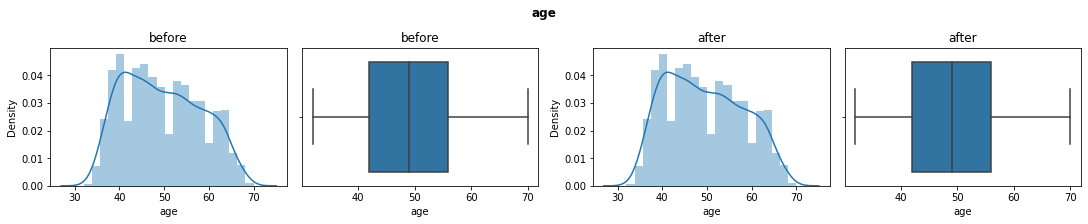

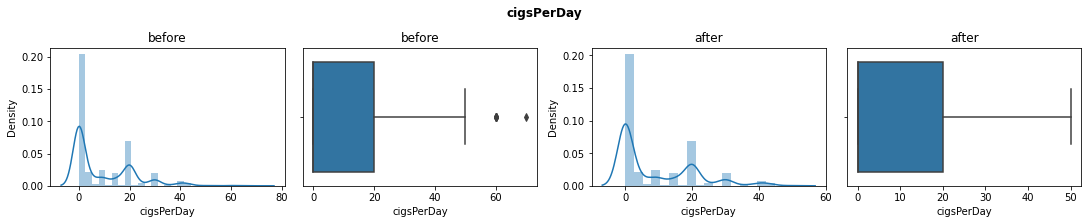

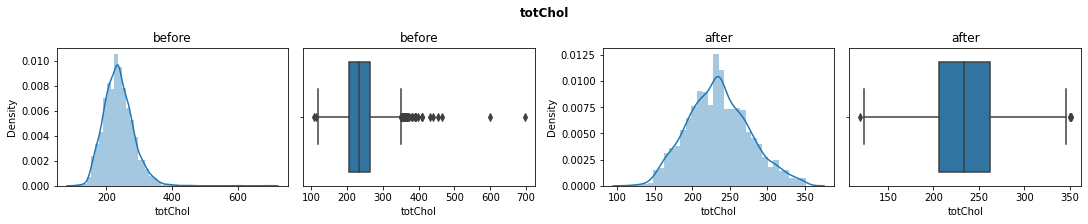

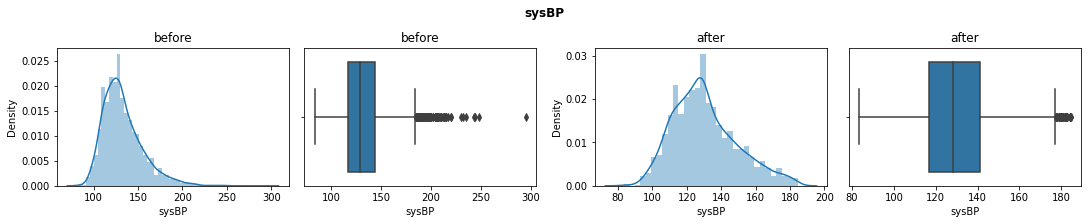

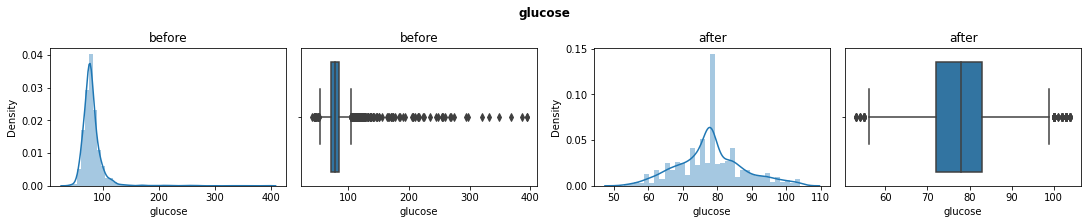

In [ ]:
# now we plot the graphs for before and after outlier treatment
for col in numerical_columns:
  fig,ax = plt.subplots(1,4,constrained_layout = True)
  fig.set_size_inches(15,3)
  sns.distplot(before_otlier_treatment_df[col], ax = ax[0]).set(title='before')
  sns.boxplot(before_otlier_treatment_df[col],ax = ax[1]).set(title='before')
  #after outlier treatment
  sns.distplot(df1[col],ax=ax[2]).set(title='after')
  sns.boxplot(df1[col],ax=ax[3]).set(title='after')
  plt.suptitle(f'{col}', weight = 'bold')
  plt.show()
#at this point outliers from the numerical columns has been treated.... and now we work with categorical columns.

#**Working with categorical values**

In [ ]:
df1[categorical_columns].isnull().sum() #So, categorical columns have no null values

sex                0
is_smoking         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
TenYearCHD         0
dtype: int64

In [ ]:
df_cat=df[categorical_columns]

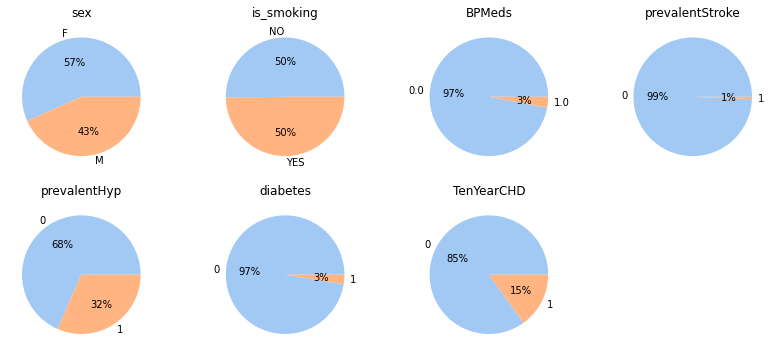

In [ ]:
for i,col in enumerate(categorical_columns):
  t_df = pd.DataFrame(df1[col].value_counts())
  palette_color = sns.color_palette('pastel')
  keys = list(t_df.index)
  data = list(t_df[col])
  plt.rcParams["figure.figsize"] = (14,6)
  plt.subplot(2,4,i+1)
  plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
  plt.title(col)       #this is the distribution and we don't have any null values in categorical columns, we do need tofix imbalance

In [ ]:
#is_smoking is available from the number_of_cigs column so we remove it
#furthermore we change the sex column to numerical
df1.replace({'sex':{'M':1,'F':0}},inplace = True)
df1=df1.drop(columns=['is_smoking'])

In [ ]:
len(list(df1.columns))

15

#**Verifying Logistic regression prerequisites**

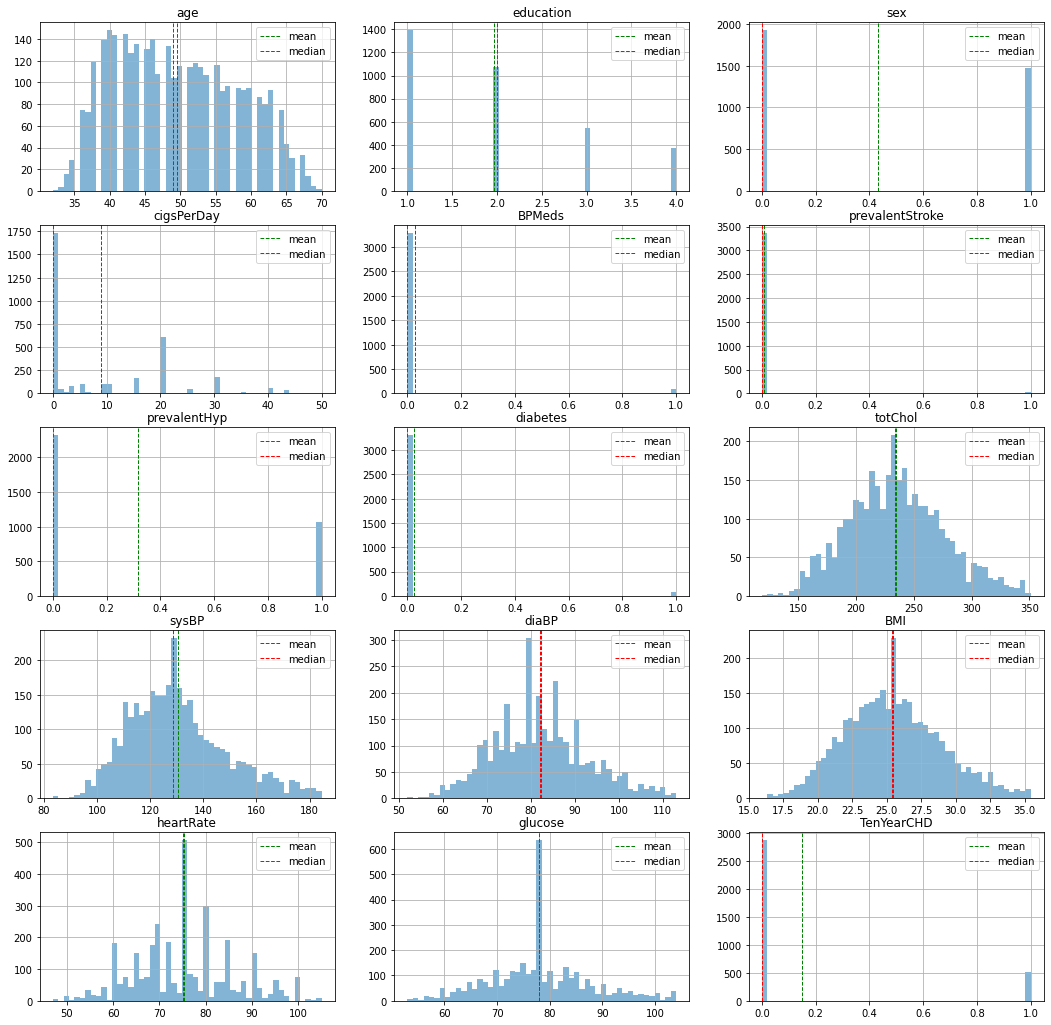

In [ ]:
for i,col in enumerate(list(df1.columns)):
  plt.subplot(5,3,i+1)
  df1[col].hist(bins=50,figsize=(18,18),alpha=0.55)
  mean=df1[col].mean()
  median=df1[col].median()
  plt.axvline(mean, color='green', linestyle='dashed', linewidth=1,label='mean')
  plt.axvline(median,color='red',linestyle='dashed', linewidth=1,label='median')
  plt.legend()
  plt.title(col)

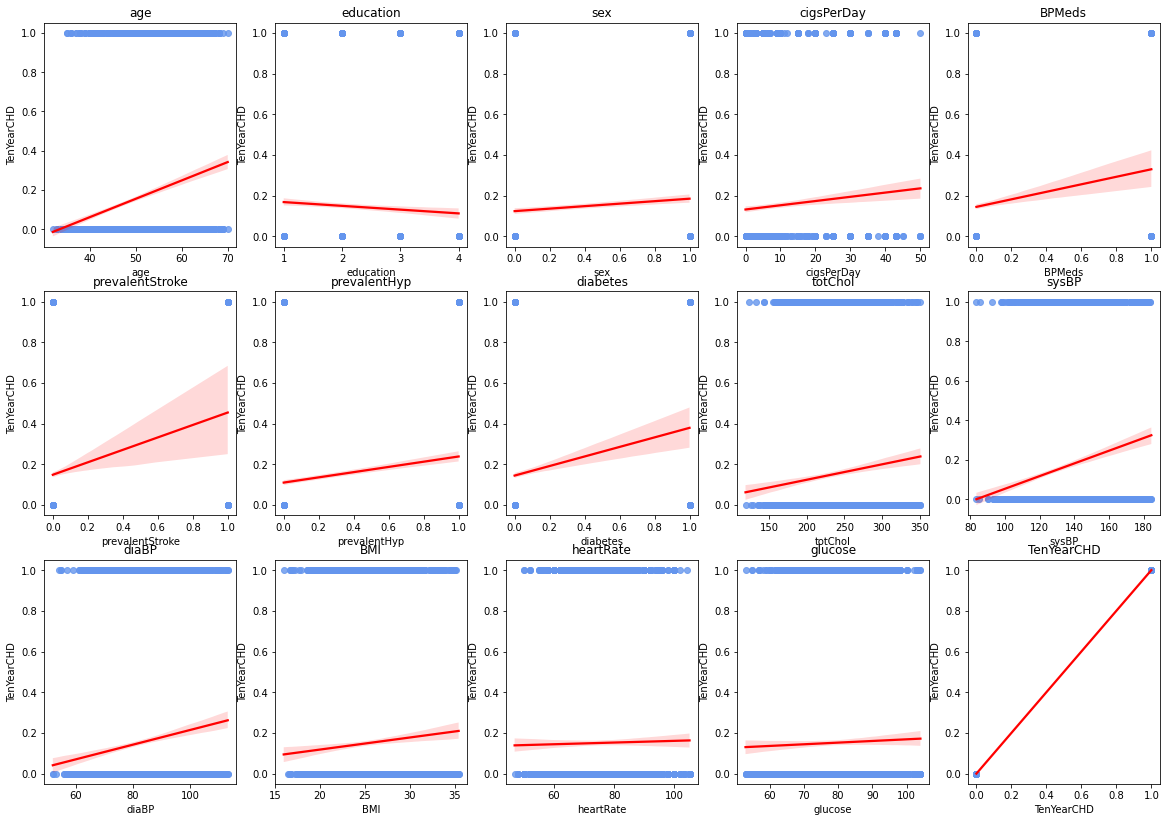

In [ ]:
#colors=['coral','cyan','orange','plum','teal','gold','indianred','lime','indigo','seagreen','cornflowerblue','lawngreen','deepskyblue','chocolate']
for i, col in enumerate(list(df1.columns)):
  plt.subplot(3,5,i+1)
  var=df1[col]
  g=sns.regplot(var, df1['TenYearCHD'],line_kws={"color": "red"},color='cornflowerblue')
  g.figure.set_size_inches(20,14)
  plt.title(col)   #So, almost all variables share some kind of relation with target variable
                    # Thus, logistic regression should work fine

#**Preparing data for Logistic regression**

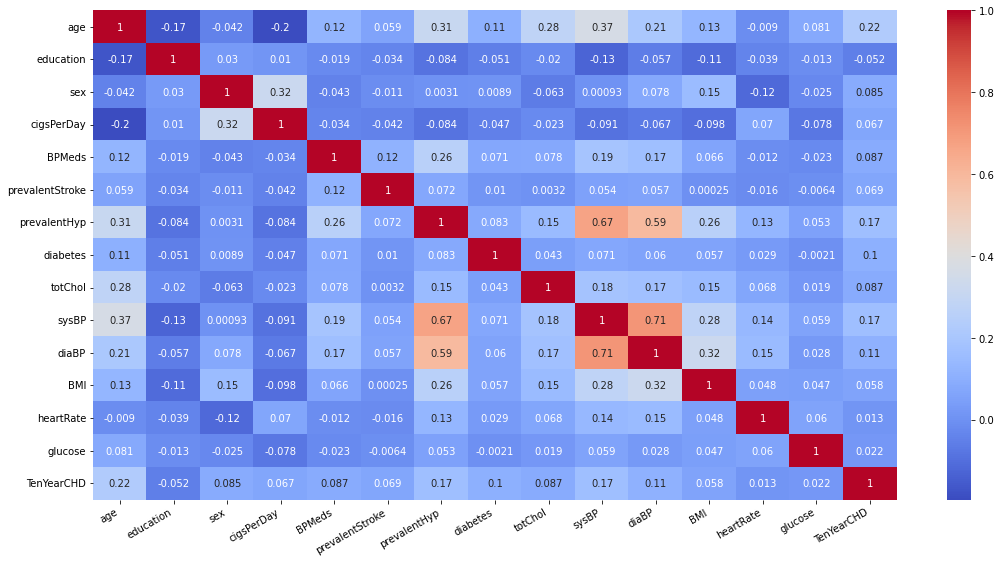

In [ ]:
plt.figure(figsize=(18,9))
plot=sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def get_VIF(X):
  '''Gives the VIF values of the variables for a dataframe'''
  vif_data = pd.DataFrame()
  vif_data["feature"] = X.columns
    
  # calculating VIF for each feature
  vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                            for i in range(len(X.columns))]
  return vif_data
    

In [ ]:
independent_var = list(set(df1.columns)-{'TenYearCHD'})
dependent_var = ['TenYearCHD']

In [ ]:
df2 = df1.copy()

In [ ]:
df1['mean_BP'] = df1['sysBP'] + df1['diaBP'] / 2
df1['BMI&Glucose'] = 0.72*df1['BMI'] + 0.28*df1['glucose']
df1['BP&pulse&chol'] = (df1['mean_BP'] + df1['totChol'] + df1['heartRate']) /3
df1['main_var'] = (df1['age'] + df1['BP&pulse&chol']) / 2

In [ ]:
get_VIF(df1[list(set(df1.columns) - {'sysBP','diaBP','TenYearCHD','BMI','glucose','mean_BP','BMI&Glucose','heartRate','totChol','age','BP&pulse&chol'})])

,feature,VIF
0,BPMeds,1.120220
1,diabetes,1.042751
2,prevalentHyp,1.718435
3,prevalentStroke,1.024240
4,main_var,6.427282
5,education,4.572397
6,cigsPerDay,1.773878
7,sex,1.960457


In [ ]:
#finalizing dataframe for logistic regression
df1 = df1[list(set(df1.columns) - {'sysBP','diaBP','TenYearCHD','BMI','glucose','mean_BP','BMI&Glucose','heartRate','totChol','age','BP&pulse&chol'})]

#**Train Test split and oversampling for logistic regression and SVM classifier**

In [ ]:
#initilizing minmax scaler
scaler = MinMaxScaler()
X=df1
Y=df2['TenYearCHD']

#splitting the dataset

X_train, X_test, Y_train, Y_test = train_test_split( X,Y , test_size = 0.2, random_state = 0, stratify=Y)

#standardizing

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(f'Before X_train : {X_train.shape}')
print(f'Before Y_train :\n{Y_train.value_counts()}')
#Handling class imbalance by oversampling it using smote and removinh tomek links
X_smote, Y_smote = SMOTETomek(random_state=42).fit_resample(X_train,Y_train)
print(f'After X_smote : {X_smote.shape}')
print(f'After Y_smote :\n{Y_smote.value_counts()}')

Before X_train : (2712, 8)
Before Y_train :
0    2303
1     409
Name: TenYearCHD, dtype: int64
After X_smote : (3996, 8)
After Y_smote :
0    1998
1    1998
Name: TenYearCHD, dtype: int64


#**Logistic Regression Implementation**

In [ ]:
#Now, we fit the models first is Linear regression
log_reg = LogisticRegression()
params_grid = {'penalty' :['l1', 'l2', 'elasticnet', 'none'],
               'C':np.logspace(-3,10,10)}
logistic_reg_cv = GridSearchCV(log_reg,params_grid,cv=5,verbose=3)
logistic_reg_cv.fit(X_smote,Y_smote)

print("tuned hpyerparameters :(best parameters) ",logistic_reg_cv.best_params_)
print("accuracy :",logistic_reg_cv.best_score_) #tuned hpyerparameters :(best parameters)  {'C': 0.774263682681127, 'penalty': 'l2'}
                                                #accuracy : 0.6612391429136044

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END .................C=0.001, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END ...............C=0.001, penalty=l2;, score=0.662 total time=   0.0s
[CV 2/5] END ...............C=0.001, penalty=l2;, score=0.637 total time=   0.0s
[CV 3/5] END ...............C=0.001, penalty=l2;, score=0.656 total time=   0.0s
[CV 4/5] END ...............C=0.001, penalty=l2;, score=0.626 total time=   0.0s
[CV 5/5] END ...............C=0.001, penalty=l2;, score=0.627 total time=   0.0s
[CV 1/5] END .........C=0.001, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5] END .........C=0.001, penalty=elasticn

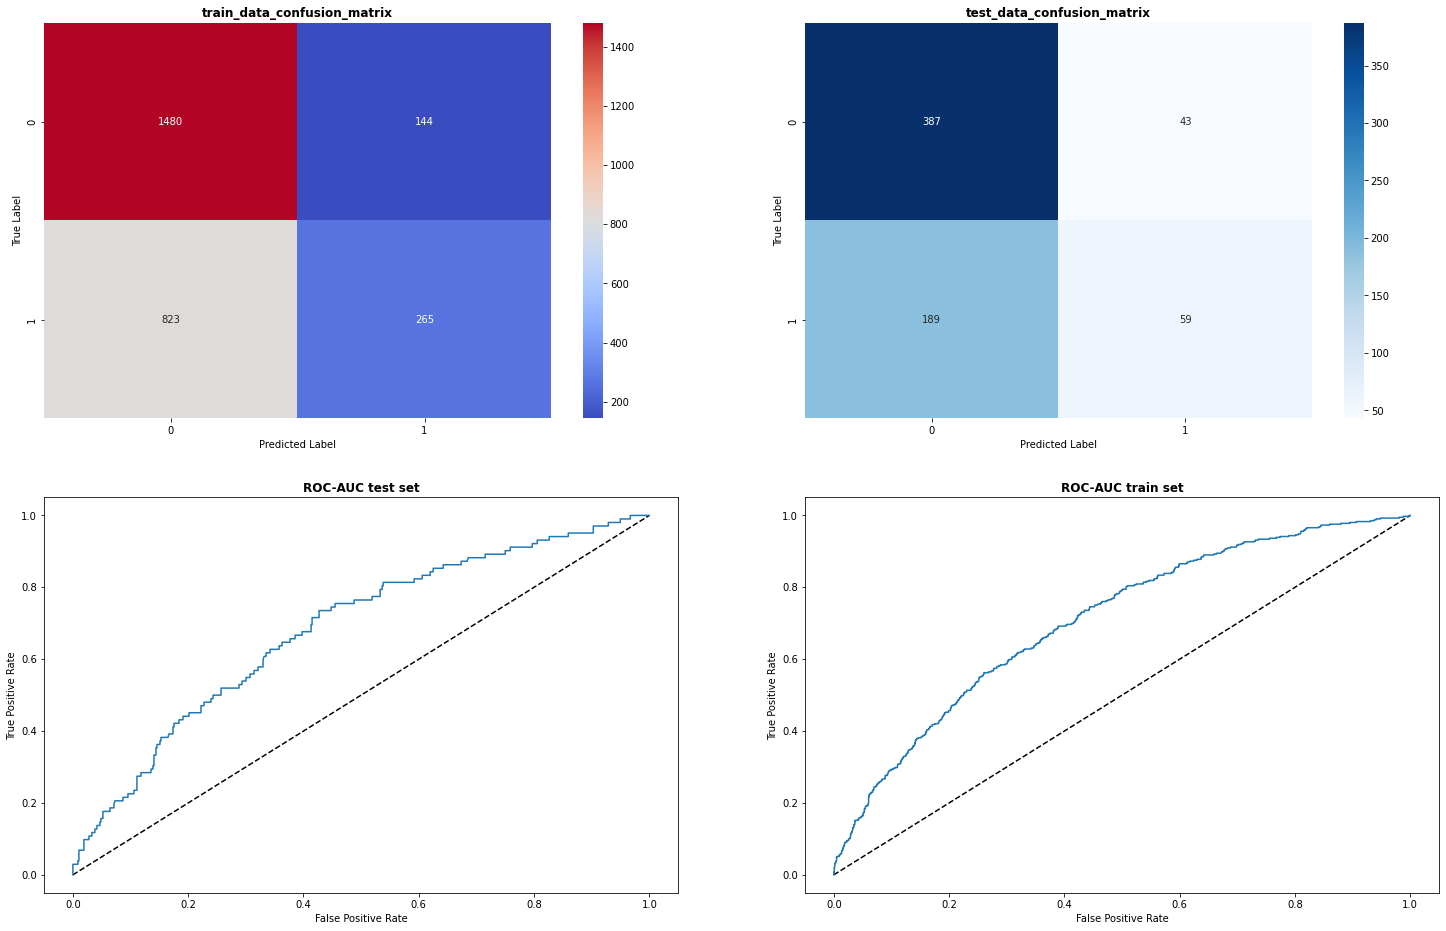

In [ ]:
#predicting test set
Y_pred = logistic_reg_cv.predict(X_test)
Y_pred_proba = logistic_reg_cv.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_proba)
#prediction train set
Y_train_pred = logistic_reg_cv.predict(X_train)
Y_train_pred_proba = logistic_reg_cv.predict_proba(X_train)[::,1]
fpr_train, tpr_train, _train = metrics.roc_curve(Y_train,  Y_train_pred_proba)
#plotting confusion matrix  
plt.subplot(2,2,1)
sns.heatmap(confusion_matrix(logistic_reg_cv.predict(X_train),Y_train),annot=True, cmap='coolwarm',fmt='g')
plt.gcf().set_size_inches(25,16)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('train_data_confusion_matrix',weight='bold')
#plt.show()

plt.subplot(2,2,2)
sns.heatmap(confusion_matrix(Y_pred,Y_test),annot=True, cmap='Blues',fmt='g')
plt.gcf().set_size_inches(25,16)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('test_data_confusion_matrix',weight='bold')
#plt.show()

plt.subplot(2,2,3)
#create ROC curve
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC-AUC test set',weight='bold')
plt.gcf().set_size_inches(25,16)
#plt.show()

plt.subplot(2,2,4)
#create ROC curve
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_train,tpr_train)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC-AUC train set',weight='bold')
plt.gcf().set_size_inches(25,16)
plt.show()

In [ ]:
#get classification reports
clf_rpt_test = pd.DataFrame(classification_report(Y_pred,Y_test,output_dict=True)).style.set_caption("Classification Report of test output")
#test classification report
clf_rpt_train = pd.DataFrame(classification_report(logistic_reg_cv.predict(X_train),Y_train,output_dict=True)).style.set_caption("Classification Report of train set")
#train classification report

In [ ]:
clf_rpt_train #train classification report

,0,1,accuracy,macro avg,weighted avg
precision,0.642640,0.647922,0.643437,0.645281,0.644759
recall,0.911330,0.243566,0.643437,0.577448,0.643437
f1-score,0.753756,0.354041,0.643437,0.553899,0.593399
support,1624.000000,1088.000000,0.643437,2712.000000,2712.000000


In [ ]:
clf_rpt_test #test classification report

,0,1,accuracy,macro avg,weighted avg
precision,0.671875,0.578431,0.657817,0.625153,0.637695
recall,0.900000,0.237903,0.657817,0.568952,0.657817
f1-score,0.769384,0.337143,0.657817,0.553263,0.611278
support,430.000000,248.000000,0.657817,678.000000,678.000000


In [ ]:
# Fits the explainer
explainer = shap.Explainer(logistic_reg_cv.predict, X_test)
# Calculates the SHAP values
shap_values = explainer(X)

Exact explainer: 3391it [00:12, 65.90it/s]                           


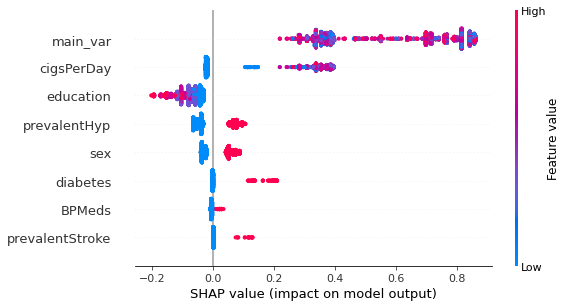

In [ ]:
shap.plots.beeswarm(shap_values)

#**Support vector classifier implementation**

In [ ]:
classifier = SVC(random_state = 0, probability = True)
C_range = [0.001,0.01,0.1,1,10,100,1000]
kernel = ['linear','poly','rbf','sigmoid']
gamma_range = [0.01,0.1,1,10,100,1000,10000,None]
#gamma_range = np.append(np.logspace(-5,2,10),None)
params_grid_svc = dict(C = C_range, kernel = kernel, gamma = gamma_range)
clf_svc_grid = GridSearchCV(classifier,params_grid_svc,cv=3,verbose=3)
clf_svc_grid.fit(X_smote,Y_smote)
print(f"The best parameters are {clf_svc_grid.best_params_} with a score of {clf_svc_grid.best_score_}")


Fitting 3 folds for each of 224 candidates, totalling 672 fits
[CV 1/3] END C=0.001, gamma=0.01, kernel=linear;, score=0.642 total time=   1.2s
[CV 2/3] END C=0.001, gamma=0.01, kernel=linear;, score=0.643 total time=   2.6s
[CV 3/3] END C=0.001, gamma=0.01, kernel=linear;, score=0.616 total time=   2.9s
[CV 1/3] END ..C=0.001, gamma=0.01, kernel=poly;, score=0.563 total time=   2.3s
[CV 2/3] END ..C=0.001, gamma=0.01, kernel=poly;, score=0.600 total time=   1.4s
[CV 3/3] END ..C=0.001, gamma=0.01, kernel=poly;, score=0.573 total time=   1.4s
[CV 1/3] END ...C=0.001, gamma=0.01, kernel=rbf;, score=0.640 total time=   2.2s
[CV 2/3] END ...C=0.001, gamma=0.01, kernel=rbf;, score=0.643 total time=   2.2s
[CV 3/3] END ...C=0.001, gamma=0.01, kernel=rbf;, score=0.616 total time=   2.2s
[CV 1/3] END C=0.001, gamma=0.01, kernel=sigmoid;, score=0.643 total time=   2.2s
[CV 2/3] END C=0.001, gamma=0.01, kernel=sigmoid;, score=0.643 total time=   2.2s
[CV 3/3] END C=0.001, gamma=0.01, kernel=sig

In [ ]:
#predicting test set
Y_pred = clf_svc_grid.predict(X_test)
Y_pred_proba = clf_svc_grid.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_proba)
#prediction train set
Y_train_pred = clf_svc_grid.predict(X_train)
Y_train_pred_proba = clf_svc_grid.predict_proba(X_train)[::,1]
fpr_train, tpr_train, _train = metrics.roc_curve(Y_train,  Y_train_pred_proba)
#plotting confusion matrix  
plt.subplot(2,2,1)
sns.heatmap(confusion_matrix(Y_train_pred,Y_train),annot=True, cmap='coolwarm',fmt='g')
plt.gcf().set_size_inches(25,16)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('train_data_confusion_matrix',weight='bold')
#plt.show()

plt.subplot(2,2,2)
sns.heatmap(confusion_matrix(Y_pred,Y_test),annot=True, cmap='Blues',fmt='g')
plt.gcf().set_size_inches(25,16)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('test_data_confusion_matrix',weight='bold')
#plt.show()

plt.subplot(2,2,3)
#create ROC curve
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC-AUC test set',weight='bold')
plt.gcf().set_size_inches(25,16)
#plt.show()

plt.subplot(2,2,4)
#create ROC curve
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_train,tpr_train)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC-AUC train set',weight='bold')
plt.gcf().set_size_inches(25,16)
plt.show()